In [4]:

# For Data Preprocessing and cleaning
import pandas as pd
import numpy as np
# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"medical_cost.csv")
df.head(10)

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
5,6,31,female,25.740,0,no,southeast,3756.62160
6,7,46,female,33.440,1,no,southeast,8240.58960
7,8,37,female,27.740,3,no,northwest,7281.50560
8,9,37,male,29.830,2,no,northeast,6406.41070
9,10,60,female,25.840,0,no,northwest,28923.13692


In [6]:
df.shape

(1338, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.groupby('sex').agg({'Id':'count','charges':'mean'}).reset_index()

,sex,Id,charges
0,female,662,12569.578844
1,male,676,13956.751178


In [10]:
df.groupby('smoker').agg({'Id':'count','charges':'mean'}).reset_index()

,smoker,Id,charges
0,no,1064,8434.268298
1,yes,274,32050.231832


/var/folders/8p/k53fc7ts35s14vp_531mgq4c0000gn/T/ipykernel_68708/3460904535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = df['region'],y = df['Id'],


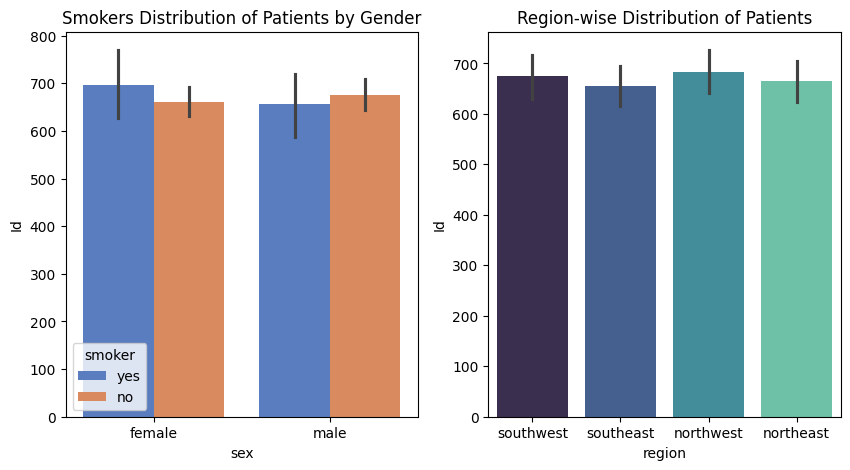

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
sns.barplot(data = df, x = df['sex'], y = df['Id'], hue = "smoker", 
            ax=ax1, palette ="muted")
ax1.set_title('Smokers Distribution of Patients by Gender')
sns.barplot(data = df, x = df['region'],y = df['Id'],
            ax=ax2, palette = "mako")
ax2.set_title('Region-wise Distribution of Patients')


plt.show()

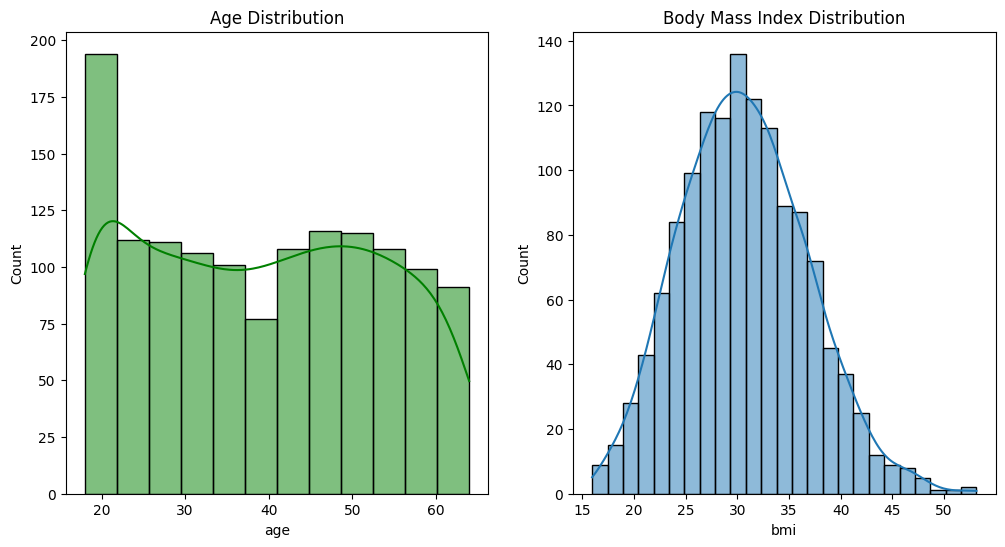

In [12]:
fi, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
sns.histplot(df['age'], kde=True, color="green",ax=ax1)
ax1.set_title("Age Distribution")
sns.histplot(df['bmi'],kde=True, ax=ax2)
ax2.set_title("Body Mass Index Distribution")
plt.show()

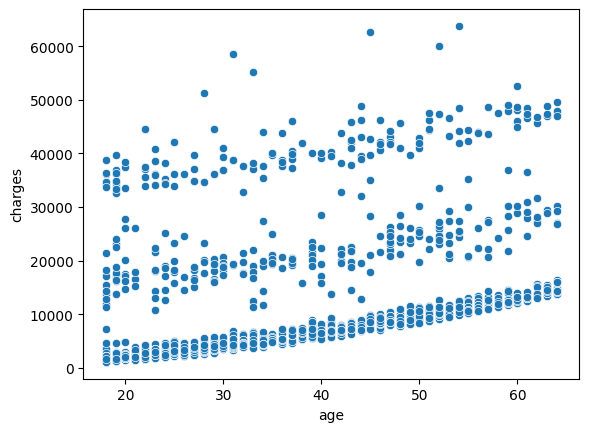

In [13]:
sns.scatterplot(data=df, x = df['age'], y = df['charges'])
plt.show()

/var/folders/8p/k53fc7ts35s14vp_531mgq4c0000gn/T/ipykernel_68708/3113205409.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = df['sex'], y = df['charges'], palette = 'muted')


<Axes: xlabel='sex', ylabel='charges'>

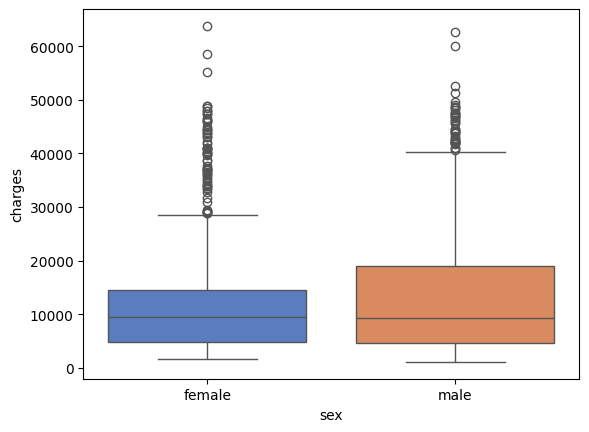

In [14]:
sns.boxplot(data=df, x = df['sex'], y = df['charges'], palette = 'muted')

/var/folders/8p/k53fc7ts35s14vp_531mgq4c0000gn/T/ipykernel_68708/679941405.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = df['smoker'], y = df['charges'], palette = "pastel")


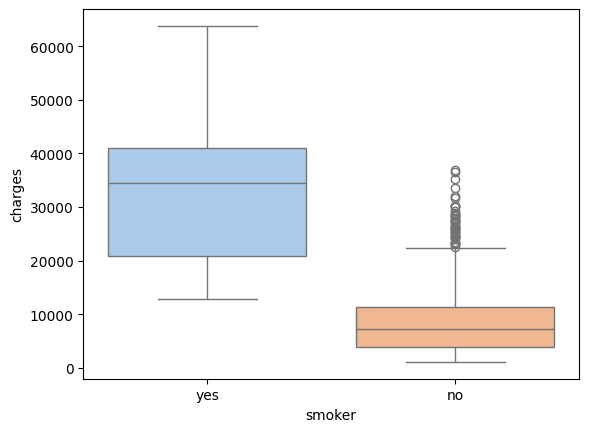

In [15]:
sns.boxplot(data=df, x = df['smoker'], y = df['charges'], palette = "pastel")
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
# Female is labeled as 0 while Male is labeled as 1
df['sex'] = le.fit_transform(df['sex'])
df['sex'].unique()

array([0, 1])

In [18]:
# Yes is labeled as 1 while No is labeled as 0
df['smoker'] = le.fit_transform(df['smoker'])
df['smoker'].unique()

array([1, 0])

In [19]:
# Northeast is labeled as 0 while Northwest is labeled as 1, Southeast is labeled as 2, 
# and Southwest is labeled as 3.
df['region'] = le.fit_transform(df['region'])
df['region'].unique()

array([3, 2, 1, 0])

In [20]:
# Variable to predict is the 'charges'
x = df.drop('charges', axis = 1)
y = df['charges']

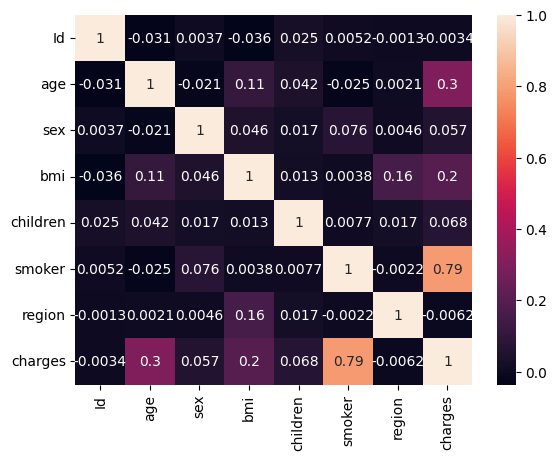

In [21]:
corr_table = df.corr()
sns.heatmap(corr_table, annot=True)
plt.show()